## Nos experimentos, as células de carga servem apenas para computar uma estimativa do centro de massa do objeto posto sobre a bancada. Para computado, usamos as posições dos sensores:

passo a passo: <https://brasilescola.uol.com.br/fisica/centro-massa.htm>

In [1]:
import numpy as np
import pandas as pd

In [2]:
Px = [-90, 90, 90, -90]
Py = [120, 120, -120, -120]

In [3]:
# corrigindo dados sem carga

data = pd.read_csv('data/com_carga_de_livro_corrigido.csv')

data

,intern_clock,1,2,3,4,5,6,7,8
0,2579974.0,-128.0,0.0,-211.0,0.0,-1.914673e+06,55745.103957,90630.916758,54475.478143
1,2580978.0,-106.0,1.0,-277.0,0.0,-1.915021e+06,291873.966798,62603.591079,349452.698860
2,2581982.0,-137.0,-7.0,-257.0,0.0,-1.719262e+06,163613.166506,245046.351721,277396.928420
3,2582986.0,-149.0,-11.0,-145.0,0.0,-1.646613e+06,406.101895,301040.686023,47262.086591
4,2583991.0,-161.0,0.0,-271.0,0.0,-1.661692e+06,86611.549261,222450.074356,236391.201913
...,...,...,...,...,...,...,...,...,...
72,2652274.0,1.0,-154.0,-222.0,0.0,-1.964184e+06,233014.591103,115484.057328,429395.110730
73,2653279.0,1.0,-158.0,-262.0,0.0,-1.890260e+06,250800.821956,309466.224880,402632.225842
74,2654282.0,1.0,-174.0,1.0,-65.0,-2.062462e+06,351008.297184,77976.900905,267417.201208
75,2655287.0,-128.0,-182.0,0.0,-43.0,-2.012743e+06,488461.802261,213208.998627,247603.216848


In [4]:
centro_de_massa_x = [0]*data.shape[0]
centro_de_massa_y = [0]*data.shape[0]

for i in range(data.shape[0]):
    centro_de_massa_x[i] = data["5"][i]*Px[0] + data["6"][i]*Px[1] + data["7"][i]*Px[2] + data["8"][i]*Px[3]
    centro_de_massa_x[i] = centro_de_massa_x[i]/(data["5"][i] + data["6"][i] + data["7"][i] + data["8"][i])
    centro_de_massa_y[i] = data["5"][i]*Py[0] + data["6"][i]*Py[1] + data["7"][i]*Py[2] + data["8"][i]*Py[3]
    centro_de_massa_y[i] = centro_de_massa_y[i]/(data["5"][i] + data["6"][i] + data["7"][i] + data["8"][i])

data["centro_de_massa_x"] = centro_de_massa_x
data["centro_de_massa_y"] = centro_de_massa_y

In [5]:
# teste de sanidade

centro_de_massa_x = [0]*data.shape[0]
centro_de_massa_y = [0]*data.shape[0]

for i in range(data.shape[0]):
    centro_de_massa_x[i] = data["6"][i]*Px[0] + data["6"][i]*Px[1] + data["7"][i]*Px[2] + data["8"][i]*Px[3]
    centro_de_massa_x[i] = centro_de_massa_x[i]/(data["6"][i] + data["6"][i] + data["7"][i] + data["8"][i])
    centro_de_massa_y[i] = data["6"][i]*Py[0] + data["6"][i]*Py[1] + data["7"][i]*Py[2] + data["8"][i]*Py[3]
    centro_de_massa_y[i] = centro_de_massa_y[i]/(data["6"][i] + data["6"][i] + data["7"][i] + data["8"][i])

data["centro_de_massa_x"] = centro_de_massa_x
data["centro_de_massa_y"] = centro_de_massa_y

In [6]:
data.drop('5', inplace=True, axis=1)
data.drop('6', inplace=True, axis=1)
data.drop('7', inplace=True, axis=1)
data.drop('8', inplace=True, axis=1)

In [7]:
data

,intern_clock,1,2,3,4,centro_de_massa_x,centro_de_massa_y
0,2579974.0,-128.0,0.0,-211.0,0.0,12.681343,-15.720950
1,2580978.0,-106.0,1.0,-277.0,0.0,-25.925196,20.689807
2,2581982.0,-137.0,-7.0,-257.0,0.0,-3.426687,-27.570756
3,2582986.0,-149.0,-11.0,-145.0,0.0,65.422785,-119.441648
4,2583991.0,-161.0,0.0,-271.0,0.0,-1.985085,-54.225776
...,...,...,...,...,...,...,...
72,2652274.0,1.0,-154.0,-222.0,0.0,-27.947138,-9.359897
73,2653279.0,1.0,-158.0,-262.0,0.0,-6.908577,-20.812075
74,2654282.0,1.0,-174.0,1.0,-65.0,-16.277881,40.857611
75,2655287.0,-128.0,-182.0,0.0,-43.0,-2.153024,43.077014


ta dando tudo errado, mas deve ser culpa do sensor ruim.

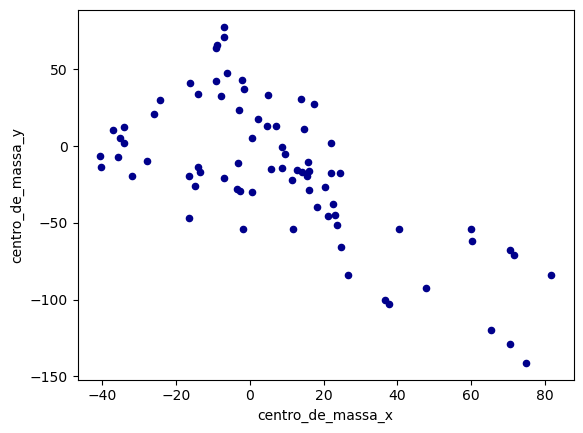

In [8]:
ax1 = data.plot.scatter(x='centro_de_massa_x',
                      y='centro_de_massa_y',
                      c='DarkBlue')

Alguns pontos caem da bancada, isso não é nada bom.

Vou treinar também os dados em forma polar

In [9]:
# teste de sanidade
import math 

centro_de_massa_r = [0]*data.shape[0]
centro_de_massa_theta = [0]*data.shape[0]

for i in range(data.shape[0]):
    centro_de_massa_r[i] = (data["centro_de_massa_x"][i]**2 + data["centro_de_massa_y"][i]**2)**(0.5)
    
    if (data["centro_de_massa_y"][i] > 0 and data["centro_de_massa_x"][i] > 0):
        centro_de_massa_theta[i] = math.atan(data["centro_de_massa_y"][i]/data["centro_de_massa_x"][i])
    
    elif (data["centro_de_massa_y"][i] > 0 and data["centro_de_massa_x"][i] < 0):
        centro_de_massa_theta[i] = math.pi/2 + math.atan(-data["centro_de_massa_x"][i]/data["centro_de_massa_y"][i])
    
    elif (data["centro_de_massa_y"][i] < 0 and data["centro_de_massa_x"][i] > 0):
        centro_de_massa_theta[i] = math.atan(-data["centro_de_massa_x"][i]/data["centro_de_massa_y"][i])
    
    elif (data["centro_de_massa_y"][i] < 0 and data["centro_de_massa_x"][i] < 0):
        centro_de_massa_theta[i] = math.pi*3/2 + math.atan(data["centro_de_massa_y"][i]/data["centro_de_massa_x"][i])

    elif (data["centro_de_massa_x"][i] == 0):
        centro_de_massa_theta[i] = 0
        
data["centro_de_massa_r"] = centro_de_massa_r
data["centro_de_massa_theta"] = centro_de_massa_theta

In [10]:
data

,intern_clock,1,2,3,4,centro_de_massa_x,centro_de_massa_y,centro_de_massa_r,centro_de_massa_theta
0,2579974.0,-128.0,0.0,-211.0,0.0,12.681343,-15.720950,20.198137,0.678784
1,2580978.0,-106.0,1.0,-277.0,0.0,-25.925196,20.689807,33.169020,2.468037
2,2581982.0,-137.0,-7.0,-257.0,0.0,-3.426687,-27.570756,27.782886,6.159532
3,2582986.0,-149.0,-11.0,-145.0,0.0,65.422785,-119.441648,136.185345,0.501105
4,2583991.0,-161.0,0.0,-271.0,0.0,-1.985085,-54.225776,54.262099,6.246594
...,...,...,...,...,...,...,...,...,...
72,2652274.0,1.0,-154.0,-222.0,0.0,-27.947138,-9.359897,29.472872,5.035562
73,2653279.0,1.0,-158.0,-262.0,0.0,-6.908577,-20.812075,21.928768,5.962680
74,2654282.0,1.0,-174.0,1.0,-65.0,-16.277881,40.857611,43.980835,1.949927
75,2655287.0,-128.0,-182.0,0.0,-43.0,-2.153024,43.077014,43.130786,1.620736


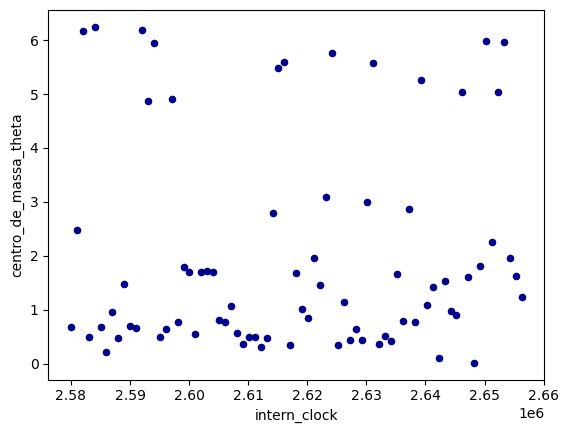

In [11]:
ax1 = data.plot.scatter(x='intern_clock',
                      y='centro_de_massa_theta',
                      c='DarkBlue')